In [2]:
import pickle
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import time
from keras.datasets import mnist

(train_X, train_y), (test_X, test_y) = mnist.load_data()

11490434/11490434 [==============================] - 13s 1us/step


In [27]:
train_X.shape

(60000, 28, 28)

In [28]:
x0_set=[]
for i in range(60000):
    x0_set.append([])
    for j in range(28):
        for k in range (28):
            x0_set[i].append(train_X[i][j][k])
            
x1_set=[]
for i in range(10000):
    x1_set.append([])
    for j in range(28):
        for k in range (28):
            x1_set[i].append(test_X[i][j][k])

In [33]:
x0_set=np.array(x0_set)
x0_set.shape

(60000, 784)

In [34]:
x1_set=np.array(x1_set)
x1_set.shape

(10000, 784)

In [36]:
test_y.shape

(10000,)

In [38]:
def shuffle_in_unison(a, b):
    assert len(a) == len(b)
    shuffled_a = np.empty(a.shape, dtype=a.dtype)
    shuffled_b = np.empty(b.shape, dtype=b.dtype)
    permutation = np.random.permutation(len(a))
    for old_index, new_index in enumerate(permutation):
        shuffled_a[new_index] = a[old_index]
        shuffled_b[new_index] = b[old_index]
    return shuffled_a, shuffled_b

a1_set, b1_set = shuffle_in_unison(x0_set, train_y) # shuffle before splitting into dev and training sets
a2_set, b2_set = shuffle_in_unison(x1_set, test_y)

X_test = a1_set/255.
Y_test = b1_set/1.

X_train = a2_set/255.
Y_train = b2_set/1.

In [39]:
y_test=[]
for i in Y_test:
    if i==0:
        y_test.append([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])
    elif i==1:
        y_test.append([0, 1, 0, 0, 0, 0, 0, 0, 0, 0])
    elif i==2:
        y_test.append([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
    elif i==3:
        y_test.append([0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
    elif i==4:
        y_test.append([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])
    elif i==5:
        y_test.append([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])
    elif i==6:
        y_test.append([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])
    elif i==7:
        y_test.append([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])
    elif i==8:
        y_test.append([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])
    elif i==9:
        y_test.append([0, 0, 0, 0, 0, 0, 0, 0, 0, 1])
y_test=np.array(y_test)
y_test=y_test/1.

y_train=[]
for i in Y_train:
    if i==0:
        y_train.append([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])
    elif i==1:
        y_train.append([0, 1, 0, 0, 0, 0, 0, 0, 0, 0])
    elif i==2:
        y_train.append([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
    elif i==3:
        y_train.append([0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
    elif i==4:
        y_train.append([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])
    elif i==5:
        y_train.append([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])
    elif i==6:
        y_train.append([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])
    elif i==7:
        y_train.append([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])
    elif i==8:
        y_train.append([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])
    elif i==9:
        y_train.append([0, 0, 0, 0, 0, 0, 0, 0, 0, 1])
y_train=np.array(y_train)
y_train=y_train/1.


y_test[100]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [40]:
print(X_train.shape)
X_test[200]

(10000, 784)


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

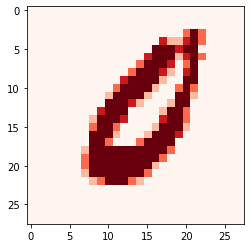

In [41]:
import matplotlib
a=X_train[500]
image_array = np.asfarray(a).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Reds', interpolation='None')

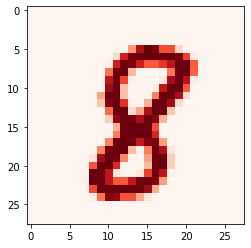

In [42]:
import matplotlib
a=X_train[388]
image_array = np.asfarray(a).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Reds', interpolation='None')

In [43]:
def accuracy(y_true, y_pred):
  ### Returns accuracy ###
  return np.sum(y_true == y_pred, axis = 0) / len(y_true)

In [44]:
n_input_dim = 28*28 # 784
n_out = 10 # 10 classes

In [45]:
def batch_loader(X, y = None, batch_size=64):
  """ Generates batches for training"""
  n_samples = X.shape[0]
  for i in np.arange(0, n_samples, batch_size):
    begin, end = i, min(i + batch_size, n_samples)
    if y is not None:
      yield X[begin:end], y[begin: end]
    else:
      yield X[begin:end]

In [46]:
class CrossEntropy():
  def __init__(self): pass

  def loss(self, y, p):
    p = np.clip(p, 1e-15, 1- 1e-15)
    return -y*np.log(p) - (1 - y) * np.log(1- p)
  
  def gradient(self, y, p):
    p = np.clip(p, 1e-15, 1- 1e-15)
    return -(y/p) + (1 - y) / (1 - p)

In [47]:
class LeakyReLU():
  def __init__(self, alpha = 0.2):
    self.alpha = alpha
  
  def __call__(self, x):
    return self.activation(x)
  
  def activation(self, x):
    return np.where(x >= 0, x, self.alpha * x)
  
  def gradient(self, x):
    return np.where(x >= 0, 1, self.alpha)

In [48]:
class Softmax():
  def __init__(self): pass
  
  def __call__(self, x):
    return self.activation(x)
  
  def activation(self, x):
    e_x = np.exp(x - np.max(x, axis = -1, keepdims=True))
    return e_x / np.sum(e_x, axis=-1, keepdims = True)
  
  def gradient(self, x):
    # Error was in our softmax
    p = self.activation(x)
    return p * (1 - p)

In [49]:
class Activation():
  def __init__(self, activation, name="activation"):
    self.activation = activation
    self.gradient = activation.gradient
    self.input = None
    self.output = None
    self.name = name
  
  def forward(self, x):
    self.input = x
    self.output = self.activation(x)
    return self.output
  
  def backward(self, output_error, lr = 0.01):
    return self.gradient(self.input) * output_error
  
  def __call__(self, x):
    return self.forward(x)

In [50]:
class Linear():
  def __init__(self, n_in, n_out, name="linear"):
    limit = 1 / np.sqrt(n_in)
    self.W = np.random.uniform(-limit, limit, (n_in, n_out))
    self.b = np.zeros((1, n_out)) # Biases
    self.input = None
    self.output = None
    self.name = name
  
  def forward(self, x):
    self.input = x
    self.output = np.dot(self.input, self.W) + self.b # Wx + b
    return self.output
  
  def backward(self, output_error, lr = 0.01):
    input_error = np.dot(output_error, self.W.T)
    delta = np.dot(self.input.T, output_error) # Calculate the weights error

    # Usually, we would allow an optimizer function to update the weights
    # but here, we just use simple SGD
    self.W -= lr * delta
    self.b -= lr * np.mean(output_error)
    # We updated the weights below
    return input_error
  
  def __call__(self, x):
    return self.forward(x)

In [53]:
class Network():
  def __init__(self, input_dim, output_dim, lr=0.01):
    # input_dim = 784, output_dim = 10 for mnist
    self.layers = [
                   Linear(input_dim, 256, name="input"),
                   Activation(LeakyReLU(), name="relu1"),
                   Linear(256, 128, name="input"),
                   Activation(LeakyReLU(), name="relu2"),
                   Linear(128, 64, name="input"),
                   Activation(LeakyReLU(), name="relu3"),
                   Linear(64, 32, name="input"),
                   Activation(LeakyReLU(), name="relu4"),
                   Linear(32, output_dim, name="output"),
                   Activation(Softmax(), name="softmax")
    ]
    self.lr = lr
  
  def forward(self, x):
    for layer in self.layers:
      x = layer(x)
    return x
  
  def backward(self, loss_grad):
    for layer in reversed(self.layers):
      loss_grad = layer.backward(loss_grad, self.lr)
    # Iterating backwards through the layers
  
  def __call__(self, x):
    return self.forward(x)

In [52]:
criterion = CrossEntropy()
model = Network(n_input_dim, n_out, lr=5e-3)

In [54]:
EPOCHS = 10
loss_tracker=list()

for epoch in range(EPOCHS):
  loss = []
  acc = []
  for x_batch, y_batch in batch_loader(X_train, y_train):
    out = model(x_batch) # Forward pass
    loss.append(np.mean(criterion.loss(y_batch, out))) # Loss - for display
    # We just passed the inputs incorrectly.
    acc.append(accuracy(np.argmax(y_batch, axis=1), np.argmax(out, axis=1))) # Accuracy - FOr display
    error = criterion.gradient(y_batch, out) # Calculate gradient of loss
    model.backward(error) # Backpropagation
    loss_tracker.append(np.mean(loss))
  
  print(f"Epoch {epoch + 1}, Loss: {np.mean(loss)}, Acc: {np.mean(acc)}")

Epoch 1, Loss: 0.15201838224261602, Acc: 0.6911823248407644
Epoch 2, Loss: 0.05236589778856246, Acc: 0.9037619426751592
Epoch 3, Loss: 0.036467539172793474, Acc: 0.9360071656050956
Epoch 4, Loss: 0.026101483619025558, Acc: 0.9560111464968153
Epoch 5, Loss: 0.019684166703774396, Acc: 0.9662619426751592
Epoch 6, Loss: 0.014724807805630286, Acc: 0.9751194267515924
Epoch 7, Loss: 0.06626755116404119, Acc: 0.9124203821656051
Epoch 8, Loss: 0.01849086290574445, Acc: 0.9675557324840764
Epoch 9, Loss: 0.010489583259168853, Acc: 0.9838773885350318
Epoch 10, Loss: 0.006709340446389125, Acc: 0.990047770700637


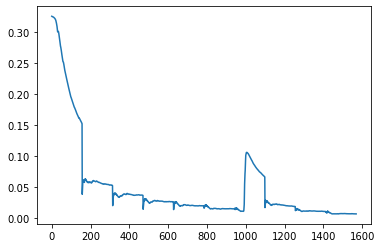

In [55]:
plt.plot(loss_tracker)
plt.show()

In [56]:
out = model(X_test) # Now we run the model on the test set
accuracy(np.argmax(y_test, axis=1), np.argmax(out, axis=1)) 

0.9421166666666667

In [57]:
prediction=model(X_test[2500])
a = np.argmax(prediction, axis=1)
print(int(a))

4


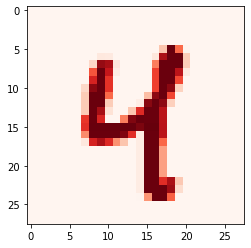

In [58]:
a=X_test[2500]
image_array = np.asfarray(a).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Reds', interpolation='None')

In [59]:
prediction=model(X_test[4000])
a = np.argmax(prediction, axis=1)
print(int(a))

7


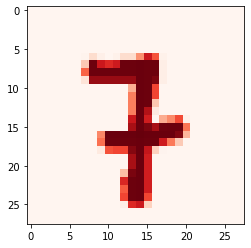

In [60]:
a=X_test[4000]
image_array = np.asfarray(a).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Reds', interpolation='None')